/home/vineshree/HSR/src/visualization/plots.py:121: SyntaxWarning: invalid escape sequence '\s'
  plt.axvspan(0.9607, 0.9691, color='green', alpha=0.15, label='Planck $n_s$ 1-$\sigma$')
/home/vineshree/HSR/src/visualization/plots.py:182: SyntaxWarning: invalid escape sequence '\s'
  plt.axvspan(0.9607, 0.9691, color='green', alpha=0.1, label='Planck 2018 (1$\sigma$)')
Running Guided ACM: 100%|██████████| 5000/5000 [04:32<00:00, 18.34it/s]


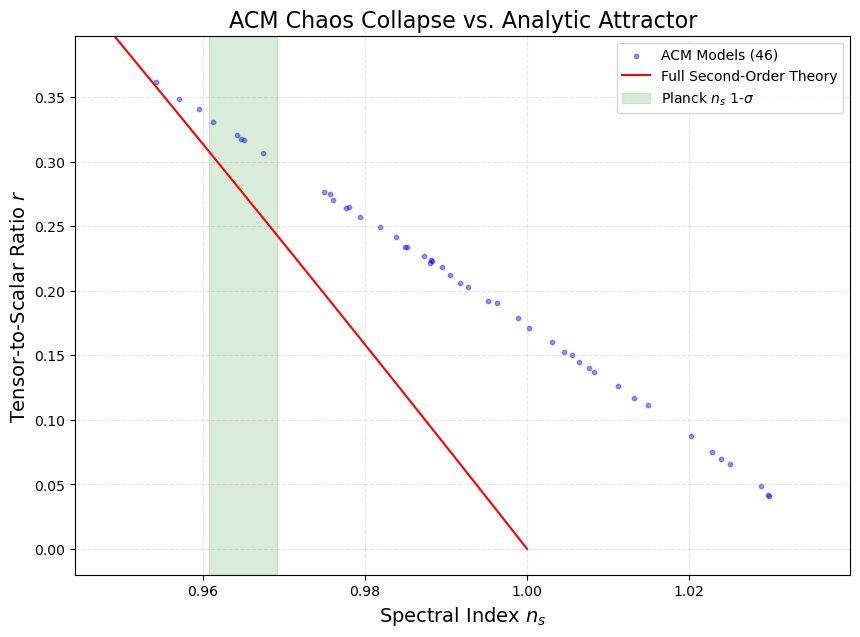

In [1]:
import sys
import os
import numpy as np

# Adds the parent directory to the python path
sys.path.append(os.path.abspath('../'))

from src.physics.dynamics import HSRSolver
from src.physics.simulation import MonteCarloRunner
#from src.visualization.plots import plot_acm_comparison
from src.visualization.plots import plot_acm_vs_attractor


# Setup
solver = HSRSolver()
runner = MonteCarloRunner(solver)

# Run Simulation
results = runner.run_batch_acm(n_sims=5000, n_obs=55)
#data = runner.run_batch_acm(n_sims=10000, n_obs=55)

# Visualize results against theoretical attractor

# This cell will only work if Cell 2 finished successfully
if 'results' in locals():
    plot_acm_vs_attractor(results)
else:
    print("Variable 'results' still not found. Please run the simulation cell.")

Stability Matrix Eigenvalues: [-6.85271795e-01+0.j  2.00000000e-09+0.j  5.00000001e-10+0.j]
System is STABLE if Re(eigs) < 0: False


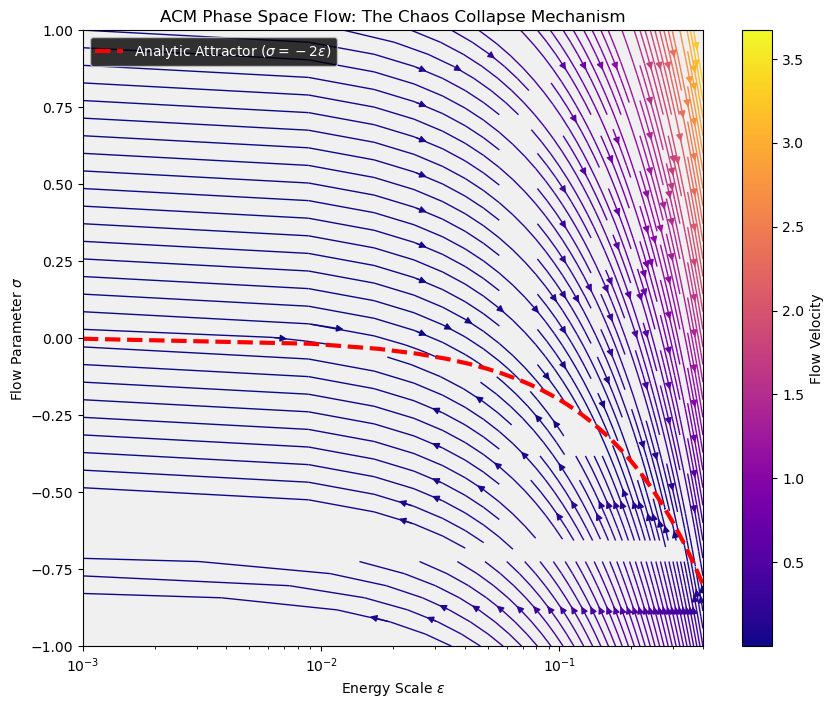

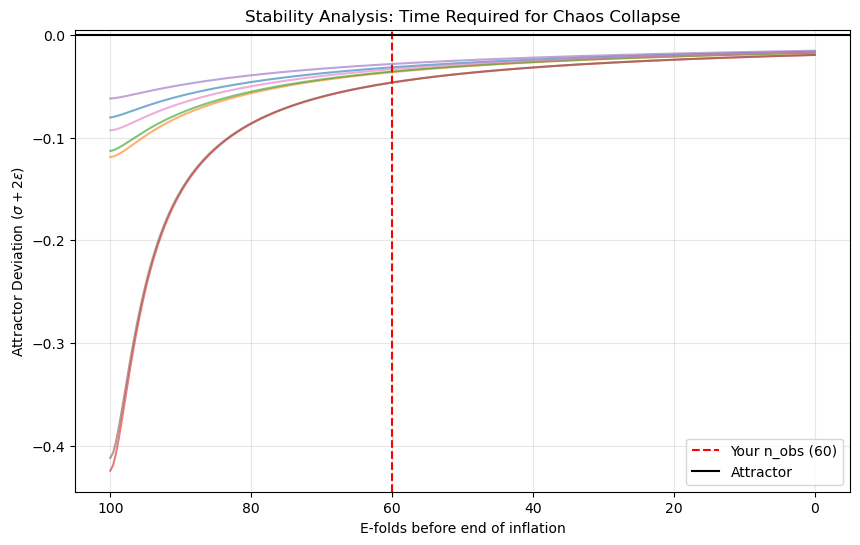

Running Guided ACM: 100%|██████████| 1000/1000 [00:53<00:00, 18.55it/s]


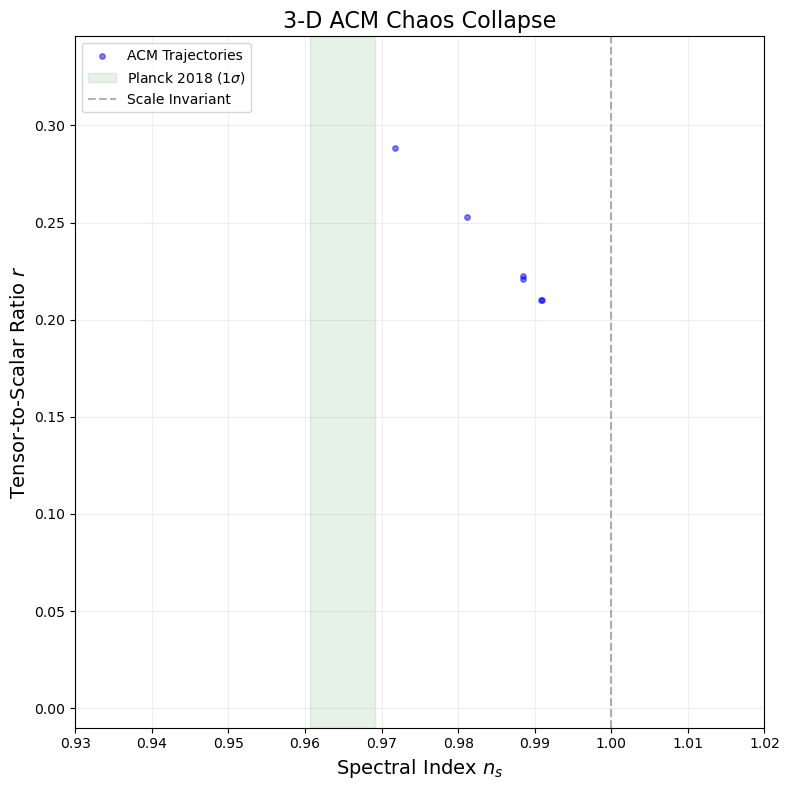

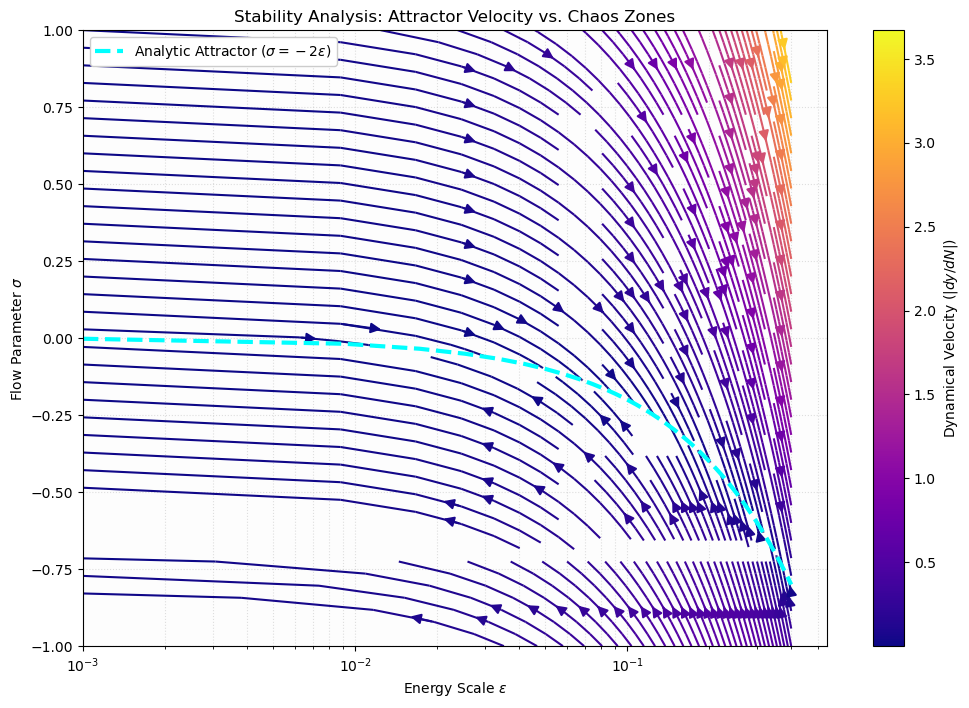

In [2]:
import sys
import os
import numpy as np

# Adds the parent directory to the python path
sys.path.append(os.path.abspath('../'))

from src.visualization.plots import plot_chaos_collapse, plot_phase_space_flow, plot_relaxation_time, plot_stability_velocity

# 1. Setup
solver = HSRSolver(c_const=0.08145)
runner = MonteCarloRunner(solver)

# 2. Stability Analysis (Math)
f_point, eigs = runner.run_stability_analysis()
print(f"Stability Matrix Eigenvalues: {eigs}")
print(f"System is STABLE if Re(eigs) < 0: {np.all(np.real(eigs) < 0)}")

# 3. Stability Analysis (Visual Flow)
# This explains WHERE the points are going
plot_phase_space_flow(solver)

# 4. Stability Analysis (Time)
# This explains WHY you need N=60 vs N=55
plot_relaxation_time(runner)

# 5. Resulting Observables
data = runner.run_batch_acm(n_sims=1000, n_obs=55)
plot_chaos_collapse(data)

#6. Run stability and velocity 
plot_stability_velocity(solver)
